## Define Our Packeges

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import f_regression
import re
import csv
sns.set()

## Load the Data

In [2]:
data = pd.read_csv(r"C:\Users\bssam\Downloads\data_preprcessed.csv")
data

,Unnamed: 0,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Price,company,Inbuilt_memory,fast_charging,Screen_resolution
0,0,4.65,68,5,4,6000,6.6,65,1000,9999,samsung,128,25,2600640
1,1,4.20,63,4,2,4000,6.4,28,512,9990,samsung,32,15,1123200
2,2,4.30,75,4,4,5000,6.6,58,1000,11999,samsung,64,25,2600640
3,3,4.10,69,4,4,5000,6.5,22,1000,11999,samsung,64,15,1152000
4,4,4.40,75,5,6,5000,6.5,57,1000,11990,samsung,128,15,1152000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1217,4.05,75,5,4,5000,6.6,62,256,18999,tcl,64,15,1160640
1218,1218,4.10,80,4,8,5000,6.8,68,256,24990,tcl,128,33,2880000
1219,1219,4.00,80,5,6,5000,6.6,68,1000,23990,tcl,256,18,1160640
1220,1220,4.50,79,5,6,5000,6.6,62,1000,22499,tcl,256,15,1160640


## Drop unneeded Columns

In [3]:
data = data.drop(['Unnamed: 0'] , axis=1)

## Show some statistics 

In [4]:
data.describe(include='all')

,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Price,company,Inbuilt_memory,fast_charging,Screen_resolution
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222,1222.000000,1222.000000,1.222000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vivo,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169,NaN,NaN,NaN
mean,4.377700,81.429624,4.783142,7.965630,4940.207038,6.680327,95.051555,426.919804,34723.023732,NaN,181.036007,51.199673,2.651677e+06
std,0.228058,7.312127,0.577728,3.139476,507.580909,0.322478,53.780028,539.955346,30887.534367,NaN,113.813749,37.592532,9.445179e+05
min,3.900000,53.000000,1.000000,2.000000,1050.000000,5.000000,7.000000,0.000000,6950.000000,NaN,32.000000,7.000000,5.896800e+05
25%,4.200000,76.000000,4.000000,6.000000,4800.000000,6.560000,62.250000,0.000000,13999.000000,NaN,128.000000,20.500000,2.579040e+06
50%,4.400000,83.000000,5.000000,8.000000,5000.000000,6.670000,81.000000,0.000000,23990.000000,NaN,128.000000,37.500000,2.592000e+06
75%,4.550000,87.000000,5.000000,8.000000,5000.000000,6.750000,114.000000,1000.000000,43990.000000,NaN,256.000000,67.000000,2.656800e+06


## Define a function to remove Outliers

In [5]:
def outliers(data , column):
    q1 = data[column].mean() + (3*data[column].std())
    q2 = data[column].mean() - (3*data[column].std())
    data = data[data[column]<q1]
    data = data[data[column]>q2]
    return data

## Remove outliers

In [6]:
data1 = outliers(data  , 'Ram')
data2 = outliers(data1 , 'Battery')
data3 = outliers(data2 , 'Display' )
data4 = outliers(data3 , 'Camera')
data5 = outliers(data4 , 'External_Memory')
data6 = outliers(data5 , 'Price')
data7 = outliers(data6 , 'Inbuilt_memory')
data8 = outliers(data7 , 'fast_charging')
data_cleaned = outliers(data8 , 'Screen_resolution')

## Get Dummy Variables

In [7]:
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True , dtype=int)

## Normalize Price Column

In [8]:
data_cleaned['log_price'] = np.log(data['Price'])

## Define our Variables

In [9]:
target = data_cleaned['log_price']
inputs = data_cleaned.drop(['log_price'],axis=1)

## Scalling

In [10]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## Split the data

In [11]:
x_train , x_test , y_train , y_test = train_test_split(inputs_scaled , target , test_size= 0.2 ,random_state = 365)

## Apply Linear Regression

In [12]:
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

## Create Summary Table

In [13]:
summary = pd.DataFrame(data = inputs.columns.values , columns=['Features'])
summary['Coef'] = reg.coef_
summary['p-value'] = f_regression(inputs_scaled,target)[1].round(3)
summary

,Features,Coef,p-value
0,Rating,0.000748,0.515
1,Spec_score,0.146912,0.000
2,No_of_sim,0.058097,0.000
3,Ram,-0.014046,0.000
4,Battery,-0.030349,0.000
5,Display,-0.016664,0.000
6,Camera,0.014801,0.000
7,External_Memory,-0.052691,0.000
8,Price,0.408006,0.000
9,Inbuilt_memory,0.024663,0.000


## Check Linearity of Results

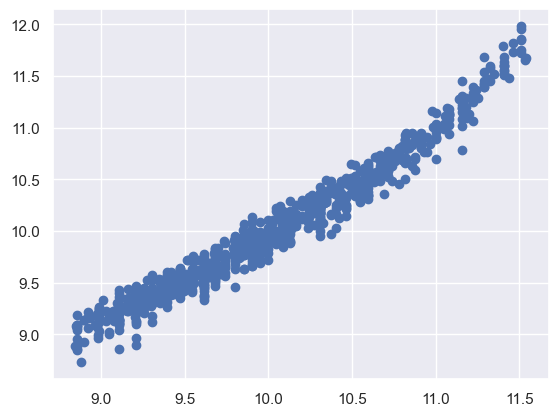

In [14]:
plt.scatter(y_train , reg.predict(x_train))

## Test our Model

In [15]:
test = pd.DataFrame()
test['Actual'] = y_test
test['Predicted'] = reg.predict(x_test)
test['Residual'] = y_test - reg.predict(x_test)

## Check our Accuracy

In [24]:
accuracy = (100 - abs((test['Residual'] / y_test) * 100)).mean()

In [25]:
accuracy

98.93240702598956